In [336]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [337]:
df = pd.read_csv('output.csv', low_memory=False)

In [338]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status
0,COOLEMORE COUNT,YVRYL,9.772000e+14,12/02/2022,B,12/02/2022,EUT,07/12/2023 14:41,EUT
1,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,EUT,07/12/2023 12:24,EUT
2,PECKIES DAFFY,VYRAJ,9.722740e+14,07/05/2021,B,26/03/2020,EUT,07/12/2023 11:34,EUT
3,SPOOK MAGOO,UNBET,9.722740e+14,10/10/2018,D,21/04/2019,RET,07/12/2023 11:24,RAC
4,SHELONE KING,UUKTL,9.722740e+14,15/04/2019,D,15/04/2019,EUT,07/12/2023 10:25,EUT
...,...,...,...,...,...,...,...,...,...
233750,KNOCKGLASS KING,VPISU,9.772000e+14,01/04/2021,D,18/03/2020,EUT,NaN,EUT
233751,HELLO HOLLIE,TDVXR,9.722740e+14,23/04/2021,B,04/08/2018,EUT,NaN,EUT
233752,SEOMRA DISC,UYIKE,9.722740e+14,04/05/2021,D,12/12/2019,EUT,NaN,EUT
233753,KILWEST NOAH,VVTMH,9.772000e+14,24/11/2021,D,20/09/2020,EUT,NaN,EUT


In [339]:
# Remove two columns name is 'C' and 'D'
df = df.drop(['Microchip','Earmark','Reg Date','Retirement Type'], axis=1)

In [340]:
df

,Greyhound Name,Sex,Whelp Date,OccuredAt,Status
0,COOLEMORE COUNT,B,12/02/2022,07/12/2023 14:41,EUT
1,SPOOK MAGOO,D,21/04/2019,07/12/2023 12:24,EUT
2,PECKIES DAFFY,B,26/03/2020,07/12/2023 11:34,EUT
3,SPOOK MAGOO,D,21/04/2019,07/12/2023 11:24,RAC
4,SHELONE KING,D,15/04/2019,07/12/2023 10:25,EUT
...,...,...,...,...,...
233750,KNOCKGLASS KING,D,18/03/2020,NaN,EUT
233751,HELLO HOLLIE,B,04/08/2018,NaN,EUT
233752,SEOMRA DISC,D,12/12/2019,NaN,EUT
233753,KILWEST NOAH,D,20/09/2020,NaN,EUT


In [341]:
# Convert date columns to datetime format
df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

C:\Users\danma\AppData\Local\Temp\ipykernel_664\371761573.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])


In [342]:
# Calculate Career Length
df["Career Length"] = (df["OccuredAt"] - df["Whelp Date"]).dt.days

In [343]:
df

,Greyhound Name,Sex,Whelp Date,OccuredAt,Status,Career Length
0,COOLEMORE COUNT,B,2022-12-02,2023-07-12 14:41:00,EUT,222.0
1,SPOOK MAGOO,D,2019-04-21,2023-07-12 12:24:00,EUT,1543.0
2,PECKIES DAFFY,B,2020-03-26,2023-07-12 11:34:00,EUT,1203.0
3,SPOOK MAGOO,D,2019-04-21,2023-07-12 11:24:00,RAC,1543.0
4,SHELONE KING,D,2019-04-15,2023-07-12 10:25:00,EUT,1549.0
...,...,...,...,...,...,...
233750,KNOCKGLASS KING,D,2020-03-18,NaT,EUT,NaN
233751,HELLO HOLLIE,B,2018-04-08,NaT,EUT,NaN
233752,SEOMRA DISC,D,2019-12-12,NaT,EUT,NaN
233753,KILWEST NOAH,D,2020-09-20,NaT,EUT,NaN


In [344]:
df = df.dropna(subset=["OccuredAt"])

In [345]:
df = df.dropna(subset=["Career Length"])

In [346]:
# Write DataFrame to a CSV file with the specified date format
df.to_csv("dataframe_output.csv", index=False)

In [347]:
df

,Greyhound Name,Sex,Whelp Date,OccuredAt,Status,Career Length
0,COOLEMORE COUNT,B,2022-12-02,2023-07-12 14:41:00,EUT,222.0
1,SPOOK MAGOO,D,2019-04-21,2023-07-12 12:24:00,EUT,1543.0
2,PECKIES DAFFY,B,2020-03-26,2023-07-12 11:34:00,EUT,1203.0
3,SPOOK MAGOO,D,2019-04-21,2023-07-12 11:24:00,RAC,1543.0
4,SHELONE KING,D,2019-04-15,2023-07-12 10:25:00,EUT,1549.0
...,...,...,...,...,...,...
229956,KIWI SANDY,B,2019-10-26,2021-10-01 06:01:00,EUT,706.0
229957,COUGARS HERO,D,2019-01-10,2021-10-01 06:01:00,EUT,995.0
229958,CLASSIC SYLVIA,B,2019-03-10,2021-10-01 06:01:00,REG,936.0
229959,VIEW HERMOINE,B,2019-12-06,2021-10-01 06:01:00,EUT,665.0


In [348]:
# Convert categorical variables using one-hot encoding
df_encoded  = pd.get_dummies(df, columns=["Sex", "Status"])

insert Lazy predict

In [350]:
 #pip install lazypredict

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [299]:
# Split the data into training and testing sets
X = df_encoded.drop(["Greyhound Name", "Whelp Date","Career Length", "OccuredAt"], axis=1)
y = df_encoded["Career Length"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model

In [300]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [301]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [302]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)

In [303]:
print("LinearRegressor Mean Squared Error:", mse)

LinearRegressor Mean Squared Error: 158650.1353171453


In [304]:
# Train a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [305]:
# Make predictions on the test set
predictions1 = model1.predict(X_test)

In [306]:
# Evaluate the model
mse1 = mean_squared_error(y_test, predictions1)

In [307]:
print("Random Forest Mean Squared Error:", mse1)

Random Forest Mean Squared Error: 158650.4826508139


In [308]:
from sklearn.ensemble import GradientBoostingRegressor

In [309]:
# Train a Gradient Boosting Regression model
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [310]:
# Make predictions on the test set
predictions2 = model2.predict(X_test)

In [311]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions2)
print("Mean Squared Error:", mse)

Mean Squared Error: 158651.81528049172


In [312]:
df

,Greyhound Name,Sex,Whelp Date,OccuredAt,Status,Career Length
0,COOLEMORE COUNT,B,2022-12-02,2023-07-12 14:41:00,EUT,222.0
1,SPOOK MAGOO,D,2019-04-21,2023-07-12 12:24:00,EUT,1543.0
2,PECKIES DAFFY,B,2020-03-26,2023-07-12 11:34:00,EUT,1203.0
3,SPOOK MAGOO,D,2019-04-21,2023-07-12 11:24:00,RAC,1543.0
4,SHELONE KING,D,2019-04-15,2023-07-12 10:25:00,EUT,1549.0
...,...,...,...,...,...,...
229956,KIWI SANDY,B,2019-10-26,2021-10-01 06:01:00,EUT,706.0
229957,COUGARS HERO,D,2019-01-10,2021-10-01 06:01:00,EUT,995.0
229958,CLASSIC SYLVIA,B,2019-03-10,2021-10-01 06:01:00,REG,936.0
229959,VIEW HERMOINE,B,2019-12-06,2021-10-01 06:01:00,EUT,665.0


In [313]:
# Calculate Career Length and classify into categories
df["Career Length"] = (df["OccuredAt"] - df["Whelp Date"]).dt.days
df["Career Category"] = pd.cut(df["Career Length"], bins=[0, 365, 730, float('inf')],
                               labels=["Short", "Medium", "Long"])

In [314]:
df

,Greyhound Name,Sex,Whelp Date,OccuredAt,Status,Career Length,Career Category
0,COOLEMORE COUNT,B,2022-12-02,2023-07-12 14:41:00,EUT,222,Short
1,SPOOK MAGOO,D,2019-04-21,2023-07-12 12:24:00,EUT,1543,Long
2,PECKIES DAFFY,B,2020-03-26,2023-07-12 11:34:00,EUT,1203,Long
3,SPOOK MAGOO,D,2019-04-21,2023-07-12 11:24:00,RAC,1543,Long
4,SHELONE KING,D,2019-04-15,2023-07-12 10:25:00,EUT,1549,Long
...,...,...,...,...,...,...,...
229956,KIWI SANDY,B,2019-10-26,2021-10-01 06:01:00,EUT,706,Medium
229957,COUGARS HERO,D,2019-01-10,2021-10-01 06:01:00,EUT,995,Long
229958,CLASSIC SYLVIA,B,2019-03-10,2021-10-01 06:01:00,REG,936,Long
229959,VIEW HERMOINE,B,2019-12-06,2021-10-01 06:01:00,EUT,665,Medium


In [315]:
 #Convert categorical variables using one-hot encoding
categorical_columns = ["Sex", "Status"]
df1_encoded = pd.get_dummies(df, columns=categorical_columns)

In [316]:
# Split the data into training and testing sets
#X = df1_encoded.drop(["Whelp Date","Greyhound Name", "Career Category", "Career Length", "OccuredAt"], axis=1)

In [317]:
#y = df1_encoded["Career Category"]

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [319]:
X_train

,Sex_B,Sex_D,Status_DIE,Status_EUT,Status_RAC,Status_REG
165612,0,1,0,0,1,0
11956,1,0,0,0,1,0
187646,0,1,0,0,1,0
227564,0,1,0,0,0,1
76342,1,0,0,0,0,1
...,...,...,...,...,...,...
119941,0,1,0,0,1,0
103749,0,1,0,0,1,0
131995,1,0,0,0,1,0
146936,0,1,0,0,1,0


In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
# Train a Random Forest Classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [322]:
# Make predictions on the test set
predictions4 = model3.predict(X_test)

In [323]:
# Evaluate the model using accuracy
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, predictions4)
print("RandforestCalssifier Accuracy:", accuracy4)

RandforestCalssifier Accuracy: 0.001537056102547743


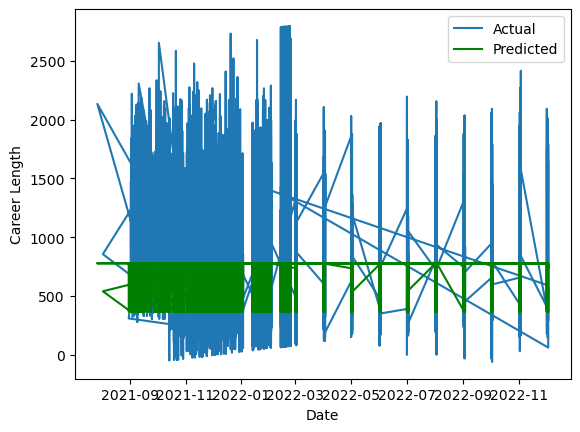

In [324]:
# Visualize predictions
plt.plot(test_data.index, test_data.values, label="Actual")
plt.plot(test_data.index, predictions4, label="Predicted", color='green')
plt.xlabel("Date")
plt.ylabel("Career Length")
plt.legend()
plt.show()

In [325]:
# Prepare a time series dataset
time_series_data = df.set_index("OccuredAt")["Career Length"]

In [326]:
# Split the time series into training and testing sets
train_size = int(0.7 * len(time_series_data))
train_data, test_data = time_series_data[:train_size], time_series_data[train_size:]

In [327]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model4 = ExponentialSmoothing(train_data, seasonal="add", seasonal_periods=12)
model_fit = model4.fit()

C:\Users\danma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danma\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [328]:
# Make predictions on the test set
predictions5 = model_fit.forecast(len(test_data))

C:\Users\danma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [329]:
# Evaluate the model
mse = mean_squared_error(test_data, predictions5)
print("Mean Squared Error:", mse)

Mean Squared Error: 176253.939133425


In [330]:
# Set OccurredAt as the index
#df.set_index("OccuredAt", inplace=True)

In [331]:
# Select status column for analysis
status_series = df[["OccuredAt","Status"]]

In [332]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [333]:
df.set_index("OccuredAt", inplace=True)


In [334]:
# Prepare a time series dataset with daily frequency
time_series_data = df.set_index("OccuredAt")
time_series_data.index.freq = 'D'

KeyError: "None of ['OccuredAt'] are in the columns"

In [ ]:
# Train an ARIMA model
order = (2, 2, 2);  # (p, d, q) order of the ARIMA model;
model = ARIMA(train_data, order=order);
model_fit = model4.fit();

In [ ]:
# Make predictions on the test set
predictions6 = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model

In [ ]:
# Evaluate the model
mse = mean_squared_error(test_data, predictions6)
print("Mean Squared Error:", mse)

In [ ]:
# Visualize predictions
plt.plot(test_data.index, test_data.values, label="Actual")
plt.plot(test_data.index, predictions6, label="Predicted", color='red')
plt.xlabel("Date")
plt.ylabel("Career Length")
plt.legend()
plt.show()

In [ ]:
(lazy predict)